Import Libraries

In [2]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 1.7 MB/s eta 0:00:00


In [18]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add


# data feature selection
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# data SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Feature Scaling
from sklearn.preprocessing import StandardScaler

Load Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dt = pd.read_csv('/content/drive/MyDrive/framingham.csv')

In [7]:
dt.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
dt.drop(['education'],axis=1,inplace=True)

In [ ]:
dt.head()

In [ ]:
#missing data calculation
missing_data = dt.isnull().sum()
percentage = (missing_data.sum()/dt.shape[0]) * 100
print(round(percentage,4))

There is 12.7% missing Data

In [8]:
# percentage of missing data per category
total = dt.isnull().sum().sort_values(ascending=False)
percent_total = (dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])

missing = missing[missing['Total']>0]

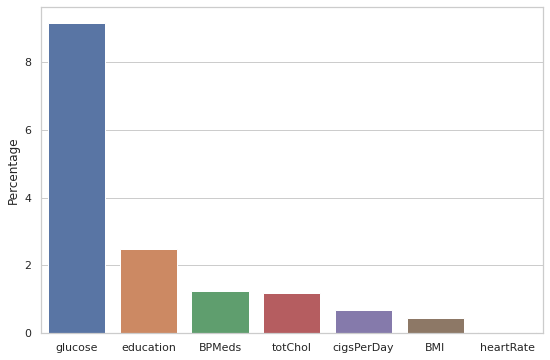

In [9]:
#plot a graph
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing.index, y=missing['Percentage'], data = missing)
plt.show()

Missing entries account for only 12% of the total data we can drop these entries

In [11]:
dt.dropna(axis=0, inplace=True)

In [10]:
dt.shape

(4240, 16)

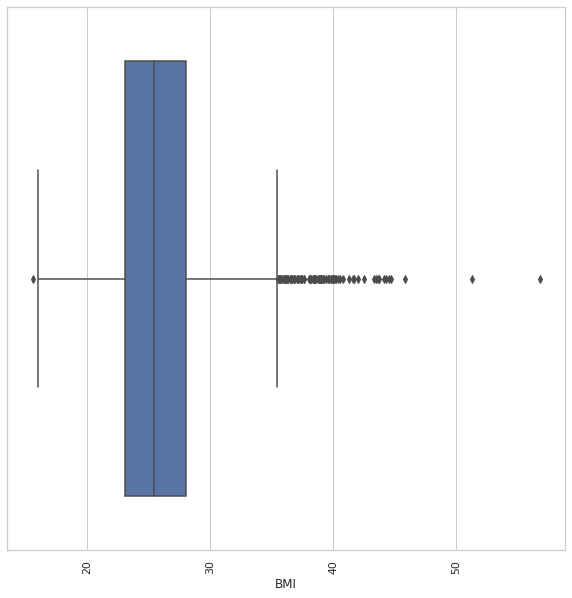

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=dt['BMI']);
plt.xticks(rotation = 90)
plt.show()

<ipython-input-13-7b888d7af4cb>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dt.hist(ax = ax)


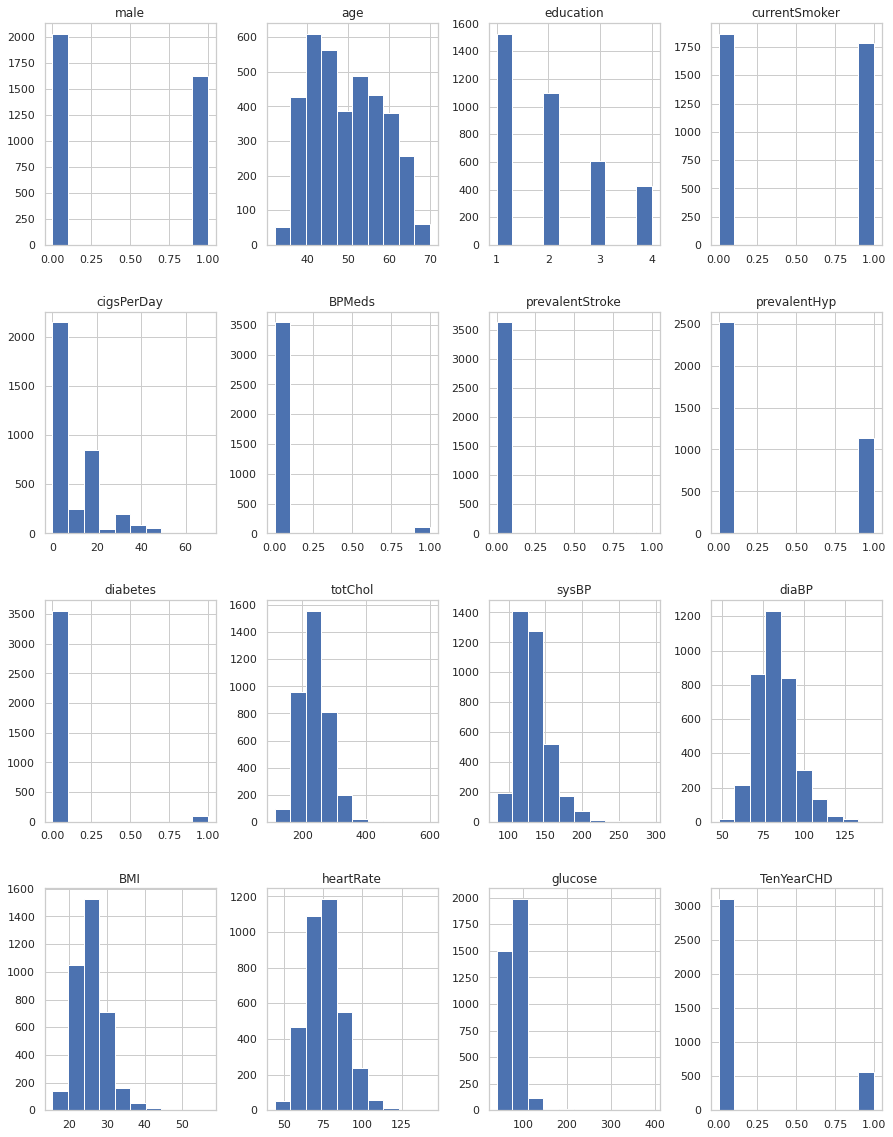

In [13]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

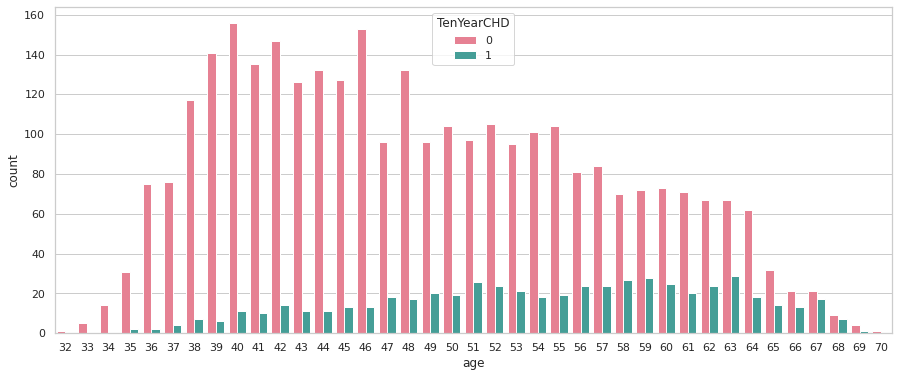

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = dt, hue = 'TenYearCHD',palette='husl')
plt.show()

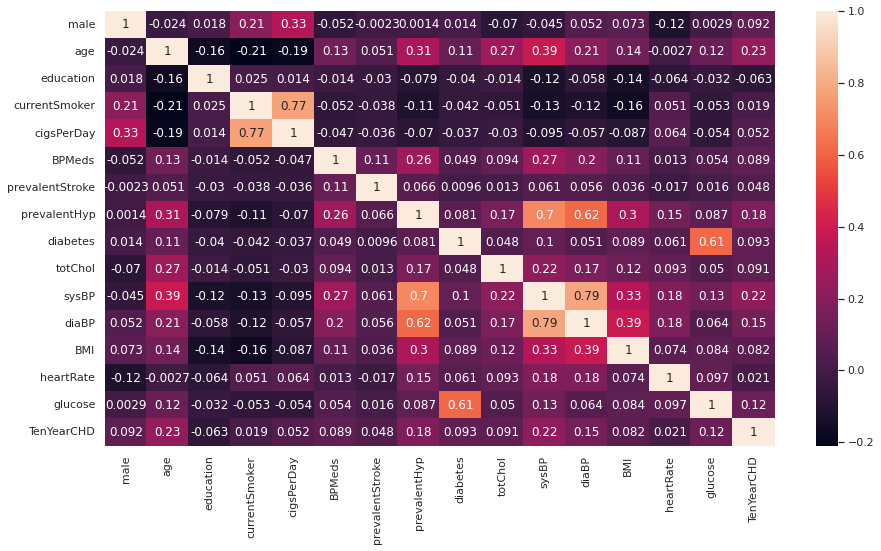

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(), annot = True)
plt.show()

In [16]:
#define the features
x = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(x, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F4A815FCB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4A815FCB40, verbose=2)

In [ ]:
# show the most important features
most_important = dt.columns[:-1][feat_selector.support_].tolist()
most_important

In [17]:
top_features = dt.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


The top features are:
    1. Age
    2. Total cholesterol
    3. Systolic blood pressure
    4. Diastolic blood pressure
    5. BMI
    6. Heart rate
    7. Blood glucose

In [20]:
X = dt[top_features]
y = dt.iloc[:,-1]
num_before = dict(Counter(y))
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

num_after =dict(Counter(y_smote))

In [22]:
#### 5.2 Splitting data to Training and Testing set 
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

Using logistic regression we get an accuracy of 65.77%
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       626
           1       0.60      0.66      0.63       490

    accuracy                           0.66      1116
   macro avg       0.66      0.66      0.66      1116
weighted avg       0.66      0.66      0.66      1116

The f1 score for logistic regression is 62.98%


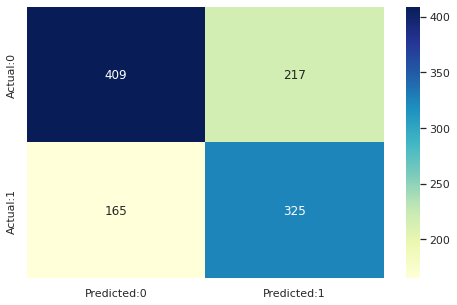

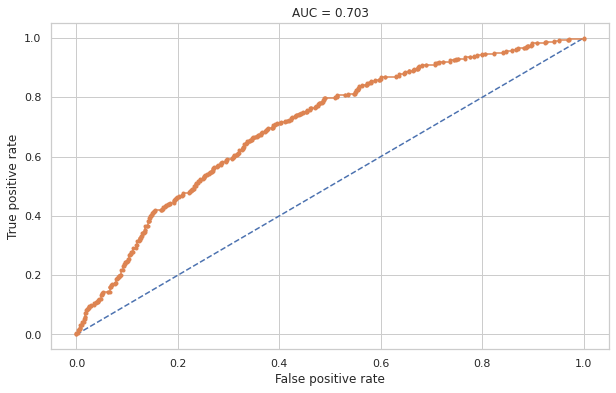

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_
#make predictions
logistic_predict = logistic_clf.predict(X_test)
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
print(classification_report(y_test,logistic_predict))
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()